In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('./dane/LR_dane_treningowe_testowe.csv')
df.head(1)

,Unnamed: 0,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP
0,0,63581743,0,16MAR39,60.0,0,11.0,67.349,0,0.0,...,1,4.461,2,0,3,0.0,18.0,0,1,5


In [ ]:
plt.figure(figsize=(12, 8))
df.CLAIM_FLAG.value_counts().nlargest(10).sort_values(ascending=False).plot.bar()
plt.title("Niezbalansowana dystrybucja klas")
plt.xlabel("Klasy")
plt.ylabel("Liczebność")

In [ ]:
_ = pd.plotting.scatter_matrix(df, figsize=(30, 30))
plt.show()

In [35]:
df.head(2)

,Unnamed: 0,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP,outlier
0,0,63581743,0,16MAR39,60.0,0,11.0,67.349,0,0.000,...,4.461,2,0,3,0.0,18.0,0,1,5,False
1,1,132761049,0,21JAN56,43.0,0,11.0,91.449,0,257.252,...,0.000,0,0,0,0.0,1.0,0,1,3,False


In [33]:
x_cols = [AGE','HOMEKIDS	YOJ	INCOME	PARENT1	HOME_VAL	...	OLDCLAIM	CLM_FREQ	REVOKED	MVR_PTS	CLM_AMT	CAR_AGE	CLAIM_FLAG	URBANICITY	AGE_GROUP]

In [33]:
for col in df.columns:
    std = df[col].std()
    mean = df[col].mean()
    outliers = (df[col] > ((3 * std) + mean)) | ((mean - (3 * std)) > df[col])
    print( f"W zmiennej {col} zidentyfikowano {outliers.sum()} rekordów ({round(outliers.sum() / df[col].notna().sum(),2)}%) jako wartości odstające")
    df['outlier'] = outliers
    df = df[df['outlier'] == False]

W zmiennej Unnamed: 0 zidentyfikowano 0 rekordów (0.0%) jako wartości odstające
W zmiennej ID zidentyfikowano 0 rekordów (0.0%) jako wartości odstające
W zmiennej KIDSDRIV zidentyfikowano 428 rekordów (0.04%) jako wartości odstające


TypeError: could not convert string to float: '16MAR39'

In [4]:
w = df['CLAIM_FLAG'].value_counts() / df.shape[0]
w

0    0.733443
1    0.266557
Name: CLAIM_FLAG, dtype: float64

In [5]:
df['sample_weights'] = 0
df['sample_weights'][df['CLAIM_FLAG'] == 0] = w[1]
df['sample_weights'][df['CLAIM_FLAG'] == 1] = w[0]

In [6]:
# standaryzacja


In [7]:
#min max
df['INCOME'] = (df['INCOME'] - df['INCOME'].min()) /  ( df['INCOME'].max() -  df['INCOME'].min())
df['OLDCLAIM'] = (df['OLDCLAIM'] - df['OLDCLAIM'].min()) /  ( df['OLDCLAIM'].max() -  df['OLDCLAIM'].min())
df['CAR_AGE'] =(df['CAR_AGE'] - df['CAR_AGE'].min()) / ( df['CAR_AGE'].max() -  df['CAR_AGE'].min())
df.head()

,Unnamed: 0,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP,sample_weights
0,0,63581743,0,16MAR39,60.0,0,11.0,0.151778,0,0.000,...,0.004465,2,0,3,0.0,0.921260,0,1,5,0.266557
1,1,132761049,0,21JAN56,43.0,0,11.0,0.173767,0,257.252,...,0.000000,0,0,0,0.0,0.787402,0,1,3,0.266557
2,2,921317019,0,18NOV51,48.0,0,11.0,0.138578,0,0.000,...,0.000000,0,0,2,0.0,0.858268,0,1,4,0.266557
3,3,727598473,0,05MAR64,35.0,1,10.0,0.104963,0,124.191,...,0.038729,2,0,3,0.0,0.858268,0,1,2,0.266557
4,4,450221861,0,05JUN48,51.0,0,14.0,0.000000,0,306.251,...,0.000000,0,0,0,0.0,0.826772,0,1,4,0.266557


In [8]:
## OpracowaćCLM_FREQ, , CLM_AMT, 

In [9]:
df['Nrow'] = [x for x in range(df.shape[0])] 

In [10]:
ids = random.sample(list(df['Nrow'].values), int(.70*df.shape[0]))
df_train = df[df['Nrow'].isin(ids)]
df_test = df[~df['Nrow'].isin(ids)]

Text(0, 0.5, 'Liczebność')

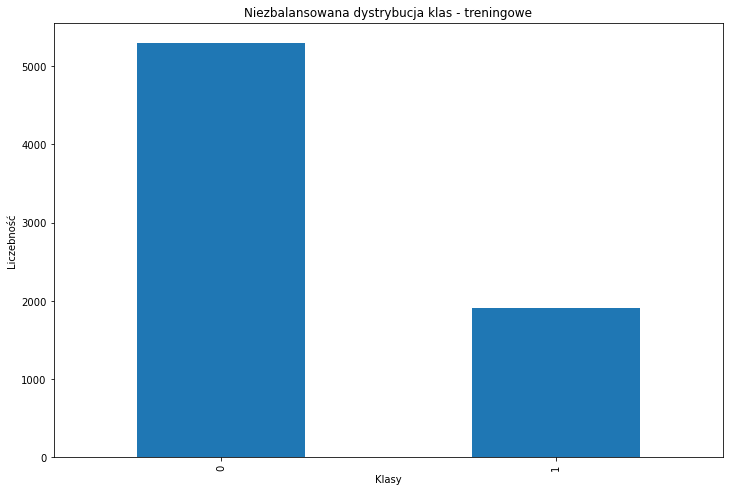

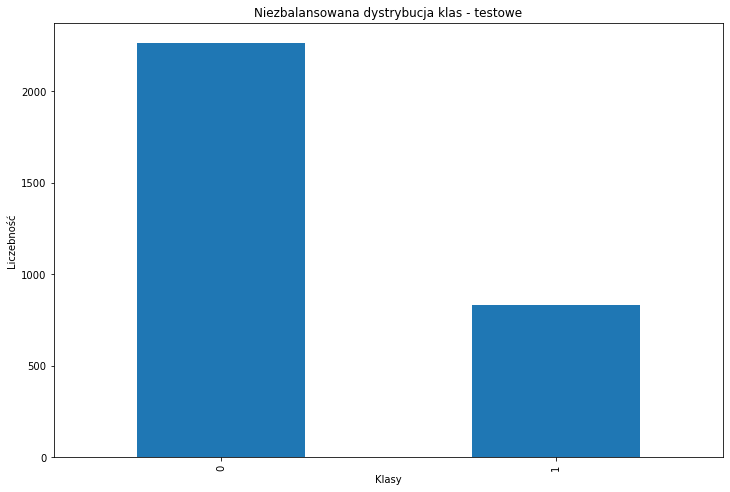

In [11]:
plt.figure(figsize=(12, 8))
df_train.CLAIM_FLAG.value_counts().nlargest(10).sort_values(ascending=False).plot.bar()
plt.title("Niezbalansowana dystrybucja klas - treningowe")
plt.xlabel("Klasy")
plt.ylabel("Liczebność")

plt.figure(figsize=(12, 8))
df_test.CLAIM_FLAG.value_counts().nlargest(10).sort_values(ascending=False).plot.bar()
plt.title("Niezbalansowana dystrybucja klas - testowe")
plt.xlabel("Klasy")
plt.ylabel("Liczebność")

MLE -  Maximum Likelihood Estimation

In [12]:
m1 = smf.logit(formula = 'CLAIM_FLAG ~ INCOME + CAR_AGE + AGE_GROUP + HOMEKIDS + MVR_PTS', data = df_train, sample_weight = df_train['sample_weights']).fit()

Optimization terminated successfully.
         Current function value: 0.549037
         Iterations 6


In [13]:
print(m1.summary().tables[0])

                           Logit Regression Results                           
Dep. Variable:             CLAIM_FLAG   No. Observations:                 7208
Model:                          Logit   Df Residuals:                     7202
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                 0.05160
Time:                        11:39:39   Log-Likelihood:                -3957.5
converged:                       True   LL-Null:                       -4172.8
Covariance Type:            nonrobust   LLR p-value:                 7.247e-91


In [14]:
print(m1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9330      0.172     -5.415      0.000      -1.271      -0.595
INCOME        -2.0897      0.484     -4.318      0.000      -3.038      -1.141
CAR_AGE       -0.1583      0.130     -1.214      0.225      -0.414       0.097
AGE_GROUP     -0.0639      0.034     -1.872      0.061      -0.131       0.003
HOMEKIDS       0.1839      0.026      6.972      0.000       0.132       0.236
MVR_PTS        0.2062      0.012     17.179      0.000       0.183       0.230


In [15]:
p = 0.5
y_pred = m1.predict(df_test)
y_pred_kwant = y_pred.copy()

y_pred_kwant[y_pred_kwant >= p] = 1
y_pred_kwant[y_pred_kwant < p] = 0

In [16]:
print(confusion_matrix(df_test["CLAIM_FLAG"], y_pred_kwant.astype(np.int32)))

[[2202   58]
 [ 730  100]]


In [17]:
y_pred_kwant.unique()

array([0., 1.])

In [18]:
acc = round(accuracy_score(y_pred_kwant, df_test["CLAIM_FLAG"]),2)*100
b_acc = round(balanced_accuracy_score(y_pred_kwant,df_test["CLAIM_FLAG"]),2)*100

print(f'Dokładność wynosi {acc} %, ale bieda')
print(f'Zbalansowana dokładność wynosi {b_acc} %, żenada')

Dokładność wynosi 74.0 %, ale bieda
Zbalansowana dokładność wynosi 69.0 %, żenada


In [19]:
print(f'Area Under Curve: {roc_auc_score(y_pred_kwant, df_test["CLAIM_FLAG"])}')
print(f'Recall score: {recall_score(y_pred_kwant, df_test["CLAIM_FLAG"])}')

Area Under Curve: 0.6919672923826135
Recall score: 0.6329113924050633


In [20]:
fpr, tpr, _ = roc_curve(df_test["CLAIM_FLAG"], y_pred)
roc_auc = auc(fpr, tpr)

No handles with labels found to put in legend.


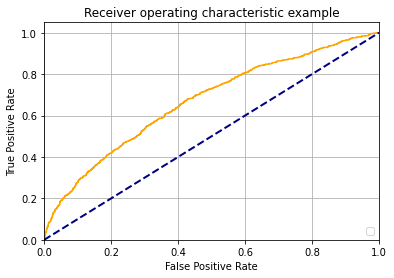

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr,color="orange")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.grid()
plt.show()

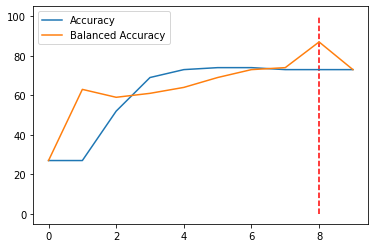

In [22]:
accl=[]
b_accl=[]
top = 10
for i in range(top):
    y_pred_kwant = y_pred.copy()
    y_pred_kwant[y_pred_kwant >= (i*0.1)] = 1
    y_pred_kwant[y_pred_kwant < (i*0.1)] = 0
    
    acc = round(accuracy_score(y_pred_kwant, df_test["CLAIM_FLAG"]),2)*100
    
    b_acc = round(balanced_accuracy_score(y_pred_kwant,df_test["CLAIM_FLAG"]),2)*100
    #print(f'Zbalansowana dokładność wynosi {b_acc} %')
    
    accl.append(acc)
    b_accl.append(b_acc)
    #print(f'{round(i*0.1)} Dokładność wynosi {acc} %')
    
plt.plot([*range(top)], accl, label = 'Accuracy')
plt.plot([*range(top)], b_accl,label = 'Balanced Accuracy' )
plt.legend()
plt.vlines(np.argmax(b_accl),0,100, color = 'red', ls='--')
plt.show()